In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Specify the path to your CSV file
# data_path = 'E:\\THESIS\\MS\\Data Collection - Preparation\\rg1-revised-cleaned-with-popcount-and-neighbors.csv'
data_path = '/content/drive/MyDrive/MS thesis/HFCAI/RG7/rg7_cleaned_sum.csv'
df = pd.read_csv(data_path)
df.head(2)

,ID,barangay_name,city_name,province_name,children_m,elderly_me,women_mean,youth_mean,women_repr,phall_mean,...,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,youth_children_sum,youth_elderly_sum,youth_phall_sum,youth_women_sum,youth_women_repr_sum,youth_youth_sum
0,3024628,Harigue,Caluya,Antique,NaN,NaN,NaN,NaN,NaN,10.900029,...,0,0,3053645,29.808382,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,3026009,Harigue,Caluya,Antique,6.026002,1.114943,16.976335,6.941848,8.295707,5.915609,...,0,0,3053645,29.304916,3.843366,0.711107,22.780833,10.827456,5.290977,4.42749


# Get HCFAI

In [3]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name', 'children_m',
       'elderly_me', 'women_mean', 'youth_mean', 'women_repr', 'phall_mean',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'youth_children_sum',
       'youth_elderly_sum', 'youth_phall_sum', 'youth_women_sum',
       'youth_women_repr_sum', 'youth_youth_sum'],
      dtype='object')

In [5]:
# Rename columns
column_mapping = {
    'youth_children_sum': 'popden_chi',
    'youth_elderly_sum': 'popden_eld',
    'youth_women_sum': 'popden_wom',
    'youth_women_repr_sum': 'popden_w_1',
    'youth_youth_sum': 'popden_you',
    'youth_phall_sum': 'popden_all',
}


df = df.rename(columns=column_mapping)
df.loc[df['RHU_Presence'] == 1, 'Distance_to_Nearest_RHU_km'] = 0
df[df['RHU_Presence'] == 1]

dropcols = ['children_m',
       'elderly_me', 'women_mean', 'youth_mean', 'women_repr', 'phall_mean']
df = df.drop(columns=dropcols)

# Get column names with NaNs using list comprehension
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

# Print the column names
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['rain intensity_value', 'buildability_landcov']


In [6]:
# Impute NaNs with 0, considering data type safety
for col in columns_with_nan:
    # Check data type before imputing (avoid unintended conversions)
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0)  # Impute with 0 for numeric columns
    else:
        df[col] = df[col].fillna('NA')  # Impute with 'NA' for non-numeric columns
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you
0,3024628,Harigue,Caluya,Antique,0.981653,1.291155,0.657261,0.0,0,0,0,3053645,29.808382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3026009,Harigue,Caluya,Antique,0.981653,1.291155,0.657261,0.0,0,0,0,3053645,29.304916,3.843366,0.711107,22.780833,10.827456,5.290977,4.427490
2,3026010,Harigue,Caluya,Antique,0.981653,1.291155,0.657261,0.0,0,0,0,3053645,29.040702,247.066082,45.712663,1464.437877,696.029735,340.123987,284.615768
3,3027392,Harigue,Caluya,Antique,0.981653,1.291155,0.657261,0.0,0,0,0,3053645,28.658474,24.104008,4.459772,142.871988,67.905340,33.182828,27.767392
4,3031522,Semirara,Caluya,Antique,0.007851,1.365579,0.630727,0.0,0,0,0,3053645,28.262097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9103,3266549,Rizal,City of Escalante,Negros Occidental,0.796297,1.190042,0.874720,0.0,0,0,1,3261018,7.995743,123.656030,156.336225,1227.330357,599.673120,273.806853,233.017252
9104,3266550,Rizal,City of Escalante,Negros Occidental,0.796297,1.190042,0.874720,0.0,0,0,0,3261018,8.845778,8.624322,10.189206,79.948800,38.878974,17.457282,14.466600
9105,3267920,Molocaboc,City of Sagay,Negros Occidental,0.007568,1.350957,0.694776,0.0,0,0,1,3261018,14.904871,115.010504,63.529618,929.065544,453.469818,222.572636,198.037038
9106,3267928,Old Poblacion,City of Escalante,Negros Occidental,0.004439,1.154519,0.845206,0.0,0,0,0,3261018,6.566200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
columns_with_nan = [col for col in df.columns if df[col].isna().any()]
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


In [8]:
def HCI_calc(total_ai, total_gi, total_hi, total_ji, total_ki, total_mi,
              distance, road_bi, POI_ci, landCov_di, hazard1_ei, hazard2_ei, hazard3_ei, rhus_fi):

    total_vulnerable = total_gi + total_hi + total_ji + total_ki + total_mi
    total_pop = total_ai
    population_to_be_served = total_vulnerable + np.maximum(0, total_pop - total_vulnerable)

    # Calculate y for the entire Series without using if condition
    y = np.where(population_to_be_served == 0, 0, 20000 / ((population_to_be_served) * (distance + rhus_fi)))
    mc = np.tanh(y)

    w_bi = 0.3 # roads
    w_ci = 0.2 # POIs
    w_di = 0.5 # land cov

    b = (POI_ci * w_ci) + (road_bi * w_bi) + (landCov_di * w_di)

    # Normalize each factor
    rain_intensity_normalized = (hazard1_ei - hazard1_ei.min()) / (hazard1_ei.max() - hazard1_ei.min())
    flood_probability_normalized = (hazard2_ei - hazard2_ei.min()) / (hazard2_ei.max() - hazard2_ei.min())
    drought_mean_normalized = (hazard3_ei - hazard3_ei.min()) / (hazard3_ei.max() - hazard3_ei.min())
    w_rain = 0.4
    w_flood = 0.3
    w_drought = 0.3
    c = (w_rain * rain_intensity_normalized) + (w_flood * flood_probability_normalized) + (w_drought * drought_mean_normalized)

    f = b - c
    f = np.tanh(f)

    hci = mc * f
    hcfai = (1 + np.tanh(hci / 2)) / 2  # Sigmoid function

    return hcfai

In [9]:
# VARIABLES
# population vulnerable
popall = df["popden_all"]
children = df["popden_chi"]
elderly = df["popden_eld"]
women = df["popden_wom"]
women_reproductive = df["popden_w_1"]
youth = df["popden_you"]
distance = df["Distance_to_Nearest_RHU_km"]

flood = df["flood_probability_value"]
rain_intensity = df["rain intensity_value"]
drought = df["drought_value"]
roads = df["Road_Presence"]
rhus = df["RHU_Presence"]
pois = df["POI_Presence"]
buildability = df["buildability_landcov"]

In [10]:
df['HCFAI'] = HCI_calc(popall, children, elderly, women, women_reproductive, youth, distance,
    roads, pois, buildability, drought, rain_intensity, flood, rhus)

# Data exploration and visualization

In [12]:
print(max(list(df['HCFAI'].unique())))
# list(df['HCFAI'].unique())
print(min(list(df['HCFAI'].unique())))
# list(df['drought_value'])
# list(df['rain intensity_value'])
# list(df['flood_probability_value'])
for col in df.columns:
  print(col)

0.6391893069688139
0.3429521909533608
ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


In [13]:
# mid_to_high = []
# for i in list(df['HCFAI']):
#     if i >= 0.53:
#         mid_to_high.append(i)

# filtered_original_df = df[df['HCFAI'].isin(mid_to_high)]
# filtered_original_df = df[df['RHU_Presence'] == 1]

# x = df['HCFAI'].notna() # removing nan values
# x = df[x]
x=df[['popden_all', 'popden_you', "popden_w_1",
                      "popden_wom", "popden_eld", 'popden_chi',
                      'Distance_to_Nearest_RHU_km', "POI_Presence", "Road_Presence", "RHU_Presence",
                      'buildability_landcov', "drought_value", "rain intensity_value",
                         "flood_probability_value", "HCFAI"]]
x = x.sort_values(by='HCFAI', ascending=False)
# x[x['RHU_Presence']==0] # 4674 rows
x # 13420 rows
# len(locs_with_RHU['RHU_Presence'])

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
4882,1154.279303,201.591884,280.851490,576.583771,111.653373,133.470134,7.843026,1,1,0,1.0,0.740146,1.298224,0.006457,0.639189
3615,451.398342,86.961410,107.083500,219.772848,45.407442,43.987224,14.319592,1,1,0,1.0,0.807057,0.717076,0.690861,0.635817
985,349.819122,71.580802,77.102185,169.190979,25.043418,45.157038,8.921273,1,1,0,1.0,0.731642,1.181657,0.472813,0.635223
895,310.043994,58.378544,75.548697,157.474876,21.094773,36.793202,4.938579,1,1,0,1.0,0.814551,1.198743,0.321251,0.633524
8746,393.690640,80.863366,96.682738,197.054104,26.748264,46.786978,16.424562,1,1,0,1.0,0.930868,0.981078,0.238556,0.633065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6856,174.039888,35.630901,39.510574,82.719071,11.786513,21.295382,16.097226,0,0,0,0.0,1.431596,0.934281,1.183509,0.345520
6852,21.029192,4.615030,5.114895,9.741550,1.871586,2.011084,20.282297,0,0,0,0.0,1.446457,0.955539,1.133584,0.345393
7227,299.054942,55.201085,64.449662,142.512930,23.789631,34.671734,22.862152,0,0,0,0.0,1.474609,0.982628,1.136026,0.344382
6854,89.399166,17.823400,20.974238,42.606862,6.724924,10.299010,18.426977,0,0,0,0.0,1.482516,0.954716,1.152423,0.342952


In [14]:
locs_with_RHU = x[x['RHU_Presence']==1] # 27 rows (bcos there are nan values we disregarded)
locs_with_RHU

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
4144,3211.062683,633.544441,833.639571,1572.031112,283.915409,306.461084,0.0,1,1,1,1.0,0.938416,0.795087,0.685397,0.625539
4452,814.513680,172.893638,197.674230,388.456658,71.196410,73.788582,0.0,1,0,1,1.0,0.866735,0.773717,0.572783,0.577083
7600,4878.476179,1049.851057,1306.412444,2481.593284,381.986879,494.205708,0.0,1,1,1,0.0,0.725480,1.061793,0.758324,0.524104
5254,28494.909400,5746.401039,7912.305531,14764.991436,2640.436940,2416.628907,0.0,1,1,1,0.0,0.696549,1.329971,0.986622,0.502779
9049,1415.436728,269.271000,344.517715,692.556623,131.389184,140.973856,0.0,1,1,1,0.0,0.948480,1.059738,0.787700,0.499446
3706,10582.542818,2167.048079,2910.106146,5347.776667,896.653614,998.645657,0.0,1,1,1,0.0,1.007699,0.845638,0.899737,0.497681
8894,10469.706648,2070.538194,2800.546858,5313.559888,953.805137,971.828944,0.0,1,1,1,0.0,0.900575,1.083043,1.082918,0.490806
6356,17787.936723,3396.655452,4818.830072,9134.752375,1898.919008,1572.814985,0.0,1,1,1,0.0,1.204965,0.853051,0.971393,0.480048
3213,4016.028838,773.335196,1035.247941,2018.570713,421.859915,368.933912,0.0,1,1,1,0.0,1.309476,0.980863,0.615543,0.472727
4623,3467.697200,739.978773,923.032583,1731.819126,351.632349,261.072205,0.0,1,1,1,0.0,1.198168,1.230360,0.675825,0.470840


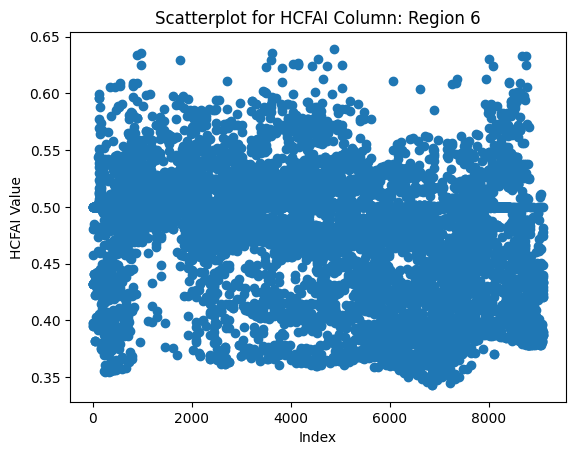

In [15]:
# Scatterplot for the 'HCFAI' column
plt.scatter(x.index, x['HCFAI'])
plt.title('Scatterplot for HCFAI Column: Region 6')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Feasibility Factors

In [ ]:
# a = a['buildability_landcov'].notna()
a = df[['Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov',
       'drought_value', 'rain intensity_value', 'flood_probability_value', 'HCFAI']]

a = a[a['RHU_Presence']==0]
a = a.sort_values(by='HCFAI', ascending=False)
a

,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5048,1,1,0,1.0,0.960775,0.430949,0.687815,0.654064
2596,1,1,0,1.0,1.141953,0.249932,0.361025,0.651058
1121,1,1,0,1.0,1.111672,0.289567,0.461596,0.650529
5267,1,0,0,1.0,0.848824,0.427353,0.224119,0.645940
5194,1,0,0,1.0,0.848824,0.427353,0.224119,0.645939
...,...,...,...,...,...,...,...,...
5590,0,0,0,NaN,1.046655,0.516940,0.426333,NaN
5591,0,0,0,NaN,1.088014,0.533677,0.440750,NaN
5596,1,1,0,NaN,0.864514,2.721783,0.598195,NaN
5680,0,1,0,NaN,0.797894,2.648136,1.438344,NaN


# Maximal Coverage Factors

In [ ]:
b = df[['popden_you', 'popden_wom', 'popden_eld', 'popden_chi',
       'popden_w_1', 'popden_all', 'Distance_to_Nearest_RHU_km', 'RHU_Presence', 'HCFAI']]
# b = b[b['buildability_landcov']==1]
b = b.sort_values(by='HCFAI', ascending=False)
# b[b['RHU_Presence']==1]
b

,popden_you,popden_wom,popden_eld,popden_chi,popden_w_1,popden_all,Distance_to_Nearest_RHU_km,RHU_Presence,HCFAI
5048,13.736079,41.149321,8.824771,8.173794,20.816993,363.896997,17.384668,0,0.654064
2596,5.296137,14.032293,2.747063,3.143041,6.904777,155.815402,31.481358,0,0.651058
1121,28.689414,77.553834,12.481618,19.290638,36.829012,125.914306,11.550333,0,0.650529
5267,0.000000,0.000000,0.000000,0.000000,0.000000,41.771628,25.204817,0,0.645940
5194,0.000000,0.000000,0.000000,0.000000,0.000000,124.261193,23.798066,0,0.645939
...,...,...,...,...,...,...,...,...,...
5590,0.000000,0.000000,0.000000,0.000000,0.000000,176.080449,19.736373,0,NaN
5591,0.000000,0.000000,0.000000,0.000000,0.000000,27.348926,19.029579,0,NaN
5596,46.984025,121.805750,14.989535,29.475215,64.996635,370.507160,15.552309,0,NaN
5680,0.000000,0.000000,0.000000,0.000000,0.000000,4.127558,18.802216,0,NaN


# EDA

In [ ]:
c=df['HCFAI'].notna()
c = df[c]
# c = df[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
#        'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
#         'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
#         'flood_probability_value', 'HCFAI']]
# c = c[c['RHU_Presence']==1]
c = c.sort_values(by='HCFAI', ascending=False)
c = c[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
       'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
        'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
        'flood_probability_value', 'HCFAI']]
c.sort_values(by='HCFAI', ascending=False)

,population_youth,population_women,population_elder60plus,population_children_under5,population_reproductive_women,popden_all_total_population,Distance_to_Nearest_RHU_km,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5703,0.000000,0.000000,0.0,0.000000,0.000000,376.429135,18.697599,1,0,0,1.0,0.542848,2.371210,0.962631,0.581876
1099,0.000000,0.000000,0.0,0.000000,0.000000,466.445625,24.862448,0,0,0,1.0,0.672856,0.268539,0.305392,0.563102
4334,0.000000,0.000000,0.0,0.000000,0.000000,1139.223628,29.861002,0,0,0,1.0,0.713175,0.153043,0.229447,0.534900
2704,0.000000,0.000000,0.0,0.000000,0.000000,23.816927,10.621421,0,0,0,1.0,0.834131,0.092033,0.815355,0.521743
3490,0.000000,0.000000,0.0,0.000000,0.000000,693.544396,13.991199,0,0,0,1.0,0.884191,0.099185,0.681102,0.516955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,11520.305136,21600.533088,0.0,2880.050256,12960.330264,50247.186329,2.858075,0,0,0,0.0,0.783897,2.857803,0.389312,0.481524
3937,0.000000,0.000000,0.0,0.000000,0.000000,2736.210123,11.314957,0,0,0,1.0,0.795406,1.766906,1.284616,0.480502
944,0.000000,0.000000,0.0,0.000000,0.000000,5875.884038,10.289214,0,0,0,0.0,0.686629,0.277878,0.934151,0.473992
5,0.000000,0.000000,0.0,0.000000,0.000000,4021.250203,16.685262,0,0,0,0.0,0.800627,1.151205,0.700863,0.467737


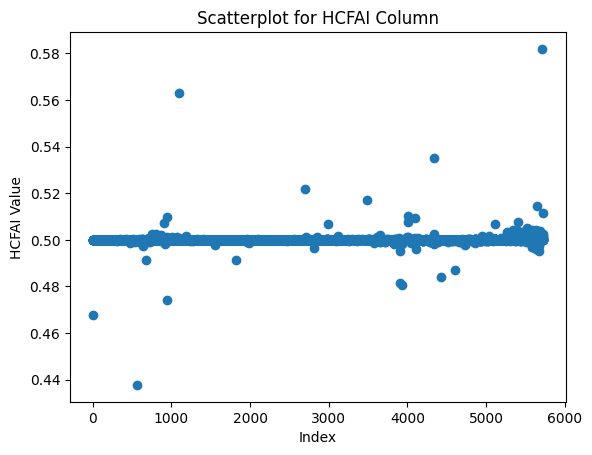

In [ ]:
# Scatterplot for the 'HCFAI' column
plt.scatter(c.index, c['HCFAI'])
plt.title('Scatterplot for HCFAI Column')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Exporting

In [16]:
# Specify the file path for the CSV file
region = 7
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_HCFAI_sum.csv'
# Export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)
print(f'DataFrame exported to CSV file: {csv_file_path}')

DataFrame exported to CSV file: /content/drive/MyDrive/MS thesis/HFCAI/RG7/rg7_HCFAI_sum.csv
